In [1]:
import pandas as pd
import seaborn as sns

In [2]:
def print_latex(df: pd.DataFrame):
    template = "\\begin{table}\n\\resizebox{\\textwidth}{!}{\n[TABLE]}\n\\caption{}\n\\label{}\n\\end{table}"
    
    table = df.to_latex(
                index=False,
                float_format="{:.2f}".format
            )
    
    print(template.replace("[TABLE]", table))

# LoRA Rank Value Experiment

In [3]:
df = pd.read_csv("../datasets/rvalue_experiment.csv")
df.head()

,Name,State,Notes,User,Tags,Created,Runtime,Sweep,_name_or_path,accelerator_config.even_batches,...,total_flos,train/epoch,train/global_step,train/grad_norm,train/learning_rate,train/loss,train_loss,train_runtime,train_samples_per_second,train_steps_per_second
0,M-7B-I-v0.2_optawbn8-cdfp16-lr000005-rv4096-ra...,finished,-,NaN,NaN,2024-07-01T01:17:47.000Z,27010,NaN,mistralai/Mistral-7B-Instruct-v0.2,True,...,1.793712e+17,2.983923,348.0,1.651407,2.125159e-07,0.1169,0.319493,26703.2127,0.210,0.013
1,M-7B-I-v0.2_optawbn8-cdfp16-lr000005-rv2048-ra...,finished,-,NaN,NaN,2024-06-30T19:29:08.000Z,20806,NaN,mistralai/Mistral-7B-Instruct-v0.2,True,...,1.617001e+17,2.983923,348.0,1.105907,1.811167e-07,0.1038,0.302758,20629.5277,0.271,0.017
2,M-7B-I-v0.2_optawbn8-cdfp16-lr000005-rv1024-ra...,finished,-,NaN,NaN,2024-06-30T11:35:16.000Z,28330,NaN,mistralai/Mistral-7B-Instruct-v0.2,True,...,1.528645e+17,2.983923,348.0,1.041399,1.811167e-07,0.1215,0.281748,28213.2539,0.198,0.012
3,M-7B-I-v0.2_optawbn8-cdfp16-lr000005-rv512-ram...,finished,-,NaN,NaN,2024-06-30T06:02:18.000Z,19878,NaN,mistralai/Mistral-7B-Instruct-v0.2,True,...,1.484468e+17,2.983923,348.0,1.031715,8.055040e-08,0.1502,0.290987,19797.6023,0.283,0.018
4,M-7B-I-v0.2_optawbn8-cdfp16-lr000005-rv256-ram...,failed,-,NaN,NaN,2024-06-30T02:45:23.000Z,11733,NaN,mistralai/Mistral-7B-Instruct-v0.2,True,...,NaN,1.972133,230.0,1.095627,1.557799e-05,0.2866,NaN,NaN,NaN,NaN


In [4]:
def clean_data(df):
    # Drop columns: 'Notes', 'User' and 128 other columns
    df = df.drop(columns=['Notes', 'User', 'Tags', 'Sweep', 'accelerator_config.even_batches', 'accelerator_config.non_blocking', 'accelerator_config.split_batches', 'accelerator_config.use_seedable_sampler', 'adafactor', 'adam_beta1', 'adam_beta2', 'adam_epsilon', 'add_cross_attention', 'attention_dropout', 'auto_find_batch_size', 'ddp_timeout', 'disable_tqdm', 'diversity_penalty', 'debug', 'do_eval', 'do_predict', 'do_sample', 'do_train', 'early_stopping', 'encoder_no_repeat_ngram_size', 'eos_token_id', 'eval_delay', 'eval_do_concat_batches', 'eval_on_start', 'fsdp', 'fsdp_config.min_num_params', 'fsdp_config.xla', 'fsdp_config.xla_fsdp_grad_ckpt', 'fsdp_config.xla_fsdp_v2', 'fsdp_min_num_params', 'full_determinism', 'group_by_length', 'hidden_act', 'hidden_size', 'hub_always_push', 'hub_private_repo', 'hub_strategy', 'hub_token', 'id2label.0', 'id2label.1', 'ignore_data_skip', 'include_num_input_tokens_seen', 'include_tokens_per_second', 'initializer_range', 'intermediate_size', 'is_decoder', 'is_encoder_decoder', 'jit_mode_eval', 'label2id.LABEL_0', 'label2id.LABEL_1', 'label_smoothing_factor', 'length_column_name', 'length_penalty', 'load_best_model_at_end', 'local_rank', 'log_level', 'log_level_replica', 'log_on_each_node', 'logging_dir', 'logging_first_step', 'logging_nan_inf_filter', 'logging_steps', 'logging_strategy', 'mp_parameters', 'no_cuda', 'no_repeat_ngram_size', 'num_attention_heads', 'num_beam_groups', 'num_beams', 'num_hidden_layers', 'num_key_value_heads', 'num_of_sequences', 'num_return_sequences', 'output_attentions', 'output_dir', 'output_hidden_states', 'output_scores', 'overwrite_output_dir', 'packing', 'past_index', 'peft_config.default.base_model_name_or_path', 'peft_config.default.bias', 'peft_config.default.fan_in_fan_out', 'peft_config.default.inference_mode', 'peft_config.default.init_lora_weights', 'peft_config.default.megatron_core', 'peft_config.default.peft_type', 'peft_config.default.use_dora', 'peft_config.default.use_rslora', 'prediction_loss_only', 'push_to_hub', 'push_to_hub_token', 'ray_scope', 'remove_invalid_values', 'remove_unused_columns', 'repetition_penalty', 'report_to', 'restore_callback_states_from_checkpoint', 'return_dict', 'return_dict_in_generate', 'rms_norm_eps', 'rope_theta', 'save_on_each_node', 'save_only_model', 'save_safetensors', 'save_steps', 'save_strategy', 'skip_memory_metrics', 'tf_legacy_loss', 'tie_encoder_decoder', 'tie_word_embeddings', 'top_k', 'top_p', 'torch_compile', 'torch_dtype', 'torchscript', 'tpu_metrics_debug', 'transformers_version', 'use_cpu', 'use_ipex', 'use_legacy_prediction_loop', 'use_mps_device', 'vocab_size', 'warmup_steps', 'weight_decay'])
    # Drop columns: 'batch_eval_metrics', 'bf16' and 12 other columns
    df = df.drop(columns=['batch_eval_metrics', 'bf16', 'bf16_full_eval', 'bos_token_id', 'chars_per_token', 'chunk_size_feed_forward', 'dataloader_drop_last', 'dataloader_num_workers', 'dataloader_persistent_workers', 'dataloader_pin_memory', 'dataset_batch_size', 'dataset_num_proc', 'dataset_text_field', 'eval_strategy'])
    # Drop columns: 'Created', 'Runtime' and 53 other columns
    df = df.drop(columns=['Created', 'Runtime', '_name_or_path', 'architectures', 'fp16', 'fp16_backend', 'fp16_full_eval', 'fp16_opt_level', 'generation_config', 'generation_num_beams', 'gradient_accumulation_steps', 'gradient_checkpointing', 'gradient_checkpointing_kwargs.use_reentrant', 'half_precision_backend', 'include_inputs_for_metrics', 'learning_rate', 'lr_scheduler_type', 'max_grad_norm', 'max_length', 'max_position_embeddings', 'max_seq_length', 'max_steps', 'min_length', 'model/num_parameters', 'model_type', 'num_train_epochs', 'optim', 'pad_token_id', 'peft_config.default.lora_alpha', 'peft_config.default.lora_dropout', 'peft_config.default.r', 'peft_config.default.target_modules', 'peft_config.default.task_type', 'per_device_eval_batch_size', 'per_device_train_batch_size', 'predict_with_generate', 'quantization_config._load_in_4bit', 'quantization_config._load_in_8bit', 'quantization_config.bnb_4bit_compute_dtype', 'quantization_config.bnb_4bit_quant_storage', 'quantization_config.bnb_4bit_quant_type', 'quantization_config.bnb_4bit_use_double_quant', 'quantization_config.llm_int8_enable_fp32_cpu_offload', 'quantization_config.llm_int8_has_fp16_weight', 'quantization_config.llm_int8_threshold', 'quantization_config.load_in_4bit', 'quantization_config.load_in_8bit', 'quantization_config.quant_method', 'run_name', 'seed', 'temperature', 'typical_p', 'use_bfloat16', 'use_cache', 'warmup_ratio'])
    # Filter rows based on column: 'eval/bleu'
    df = df[df['eval/bleu'].notna()]
    # Drop columns: 'train_runtime', 'train_samples_per_second', 'train_steps_per_second'
    df = df.drop(columns=['train_runtime', 'train_samples_per_second', 'train_steps_per_second'])
    # Drop columns: 'eval/runtime', 'eval/samples_per_second' and 2 other columns
    df = df.drop(columns=['eval/runtime', 'eval/samples_per_second', 'eval/steps_per_second', 'total_flos'])
    # Drop column: 'State'
    df = df.drop(columns=['State'])
    # Drop columns: 'train/global_step', 'train/grad_norm', 'train/learning_rate'
    df = df.drop(columns=['train/global_step', 'train/grad_norm', 'train/learning_rate'])
    # Drop column: 'train_loss'
    df = df.drop(columns=['train_loss'])
    df["Name"] = df["Name"].apply(lambda x: x.split("_")[1].split("-")[3] + " " + x.split("_")[1].split("-")[13])
    df.columns = df.columns.str.removeprefix("eval/").str.removeprefix("train/").str.replace("_", " ")
    
    return df

df_clean = clean_data(df.copy())
df_clean.head()

,Name,bleu,correct syntax,cross dice coeff,cross jaccard,cross map,cross overlap,cross precision,cross recall,cross rr,...,id precision,id recall,id rr,meteor,rouge1,rouge2,rougeL,rougeLsum,epoch,loss
0,rv4096 q8bit,0.275519,0.096774,0.006791,0.005865,0.005779,0.007168,0.006452,0.008065,0.008065,...,0.004839,0.008065,0.008065,0.391805,0.361225,0.291584,0.332307,0.359456,2.983923,0.1169
1,rv2048 q8bit,0.559709,0.653226,0.120043,0.103376,0.104378,0.142438,0.114516,0.169355,0.157258,...,0.091935,0.129032,0.110887,0.592282,0.671698,0.565649,0.623159,0.667069,2.983923,0.1038
2,rv1024 q8bit,0.387918,0.419355,0.084241,0.072608,0.072302,0.107863,0.087097,0.120968,0.106452,...,0.072581,0.088710,0.082258,0.518222,0.509783,0.408613,0.455900,0.504690,2.983923,0.1215
3,rv512 q8bit,0.550970,0.661290,0.107354,0.091502,0.094360,0.135050,0.120968,0.177419,0.155511,...,0.091935,0.112903,0.103091,0.576837,0.640684,0.531439,0.586951,0.636881,2.983923,0.1502
4,rv256 q8bit,0.522921,0.685484,0.112109,0.099626,0.101988,0.151589,0.135484,0.201613,0.157258,...,0.104839,0.137097,0.103495,0.556198,0.635656,0.526193,0.585039,0.633264,1.972133,0.2866


In [5]:
mt_metrics = ["Name", "bleu", "meteor", "rouge1", "rouge2", "rougeL", "rougeLsum", "correct syntax"]
sim_metrics = ["Name", "cross dice coeff", "cross jaccard", "cross overlap", "gnv dice coeff", "gnv jaccard", "gnv overlap", "id dice coeff", "id jaccard", "id overlap",]
ir_metrics = ["Name", "cross map", "cross precision", "cross recall", "cross rr", "gnv map", "gnv precision", "gnv recall", "gnv rr", "id map", "id precision", "id recall", "id rr"]

In [6]:
print_latex(df_clean[mt_metrics])

\begin{table}
\resizebox{\textwidth}{!}{
\begin{tabular}{lrrrrrrr}
\toprule
Name & bleu & meteor & rouge1 & rouge2 & rougeL & rougeLsum & correct syntax \\
\midrule
rv4096 q8bit & 0.28 & 0.39 & 0.36 & 0.29 & 0.33 & 0.36 & 0.10 \\
rv2048 q8bit & 0.56 & 0.59 & 0.67 & 0.57 & 0.62 & 0.67 & 0.65 \\
rv1024 q8bit & 0.39 & 0.52 & 0.51 & 0.41 & 0.46 & 0.50 & 0.42 \\
rv512 q8bit & 0.55 & 0.58 & 0.64 & 0.53 & 0.59 & 0.64 & 0.66 \\
rv256 q8bit & 0.52 & 0.56 & 0.64 & 0.53 & 0.59 & 0.63 & 0.69 \\
rv128 q8bit & 0.54 & 0.56 & 0.63 & 0.52 & 0.58 & 0.63 & 0.72 \\
rv4096 q4bit & 0.31 & 0.45 & 0.48 & 0.39 & 0.44 & 0.47 & 0.10 \\
rv2048 q4bit & 0.56 & 0.59 & 0.68 & 0.57 & 0.63 & 0.67 & 0.63 \\
rv1024 q4bit & 0.46 & 0.56 & 0.58 & 0.47 & 0.52 & 0.57 & 0.48 \\
rv512 q4bit & 0.49 & 0.56 & 0.58 & 0.47 & 0.52 & 0.58 & 0.63 \\
rv256 q4bit & 0.54 & 0.57 & 0.65 & 0.54 & 0.60 & 0.65 & 0.67 \\
rv128 q4bit & 0.54 & 0.55 & 0.61 & 0.50 & 0.55 & 0.61 & 0.64 \\
\bottomrule
\end{tabular}
}
\caption{}
\label{}
\end{table}


In [7]:
print_latex(df_clean[sim_metrics])

\begin{table}
\resizebox{\textwidth}{!}{
\begin{tabular}{lrrrrrrrrr}
\toprule
Name & cross dice coeff & cross jaccard & cross overlap & gnv dice coeff & gnv jaccard & gnv overlap & id dice coeff & id jaccard & id overlap \\
\midrule
rv4096 q8bit & 0.01 & 0.01 & 0.01 & 0.01 & 0.01 & 0.01 & 0.01 & 0.01 & 0.01 \\
rv2048 q8bit & 0.12 & 0.10 & 0.14 & 0.08 & 0.06 & 0.10 & 0.10 & 0.08 & 0.12 \\
rv1024 q8bit & 0.08 & 0.07 & 0.11 & 0.05 & 0.04 & 0.07 & 0.06 & 0.06 & 0.08 \\
rv512 q8bit & 0.11 & 0.09 & 0.14 & 0.08 & 0.06 & 0.10 & 0.08 & 0.07 & 0.10 \\
rv256 q8bit & 0.11 & 0.10 & 0.15 & 0.08 & 0.06 & 0.10 & 0.09 & 0.08 & 0.10 \\
rv128 q8bit & 0.10 & 0.09 & 0.15 & 0.06 & 0.05 & 0.10 & 0.08 & 0.07 & 0.12 \\
rv4096 q4bit & 0.01 & 0.01 & 0.01 & 0.01 & 0.00 & 0.01 & 0.01 & 0.01 & 0.01 \\
rv2048 q4bit & 0.10 & 0.09 & 0.14 & 0.07 & 0.05 & 0.10 & 0.07 & 0.06 & 0.10 \\
rv1024 q4bit & 0.06 & 0.05 & 0.08 & 0.04 & 0.03 & 0.05 & 0.05 & 0.04 & 0.05 \\
rv512 q4bit & 0.13 & 0.12 & 0.16 & 0.09 & 0.07 & 0.12 & 0.1

In [8]:
print_latex(df_clean[ir_metrics])

\begin{table}
\resizebox{\textwidth}{!}{
\begin{tabular}{lrrrrrrrrrrrr}
\toprule
Name & cross map & cross precision & cross recall & cross rr & gnv map & gnv precision & gnv recall & gnv rr & id map & id precision & id recall & id rr \\
\midrule
rv4096 q8bit & 0.01 & 0.01 & 0.01 & 0.01 & 0.01 & 0.00 & 0.01 & 0.01 & 0.01 & 0.00 & 0.01 & 0.01 \\
rv2048 q8bit & 0.10 & 0.11 & 0.17 & 0.16 & 0.06 & 0.08 & 0.11 & 0.09 & 0.08 & 0.09 & 0.13 & 0.11 \\
rv1024 q8bit & 0.07 & 0.09 & 0.12 & 0.11 & 0.04 & 0.08 & 0.10 & 0.06 & 0.06 & 0.07 & 0.09 & 0.08 \\
rv512 q8bit & 0.09 & 0.12 & 0.18 & 0.16 & 0.06 & 0.09 & 0.10 & 0.09 & 0.07 & 0.09 & 0.11 & 0.10 \\
rv256 q8bit & 0.10 & 0.14 & 0.20 & 0.16 & 0.07 & 0.11 & 0.15 & 0.09 & 0.08 & 0.10 & 0.14 & 0.10 \\
rv128 q8bit & 0.09 & 0.11 & 0.18 & 0.15 & 0.05 & 0.07 & 0.11 & 0.10 & 0.07 & 0.09 & 0.12 & 0.12 \\
rv4096 q4bit & 0.01 & 0.01 & 0.02 & 0.02 & 0.00 & 0.01 & 0.02 & 0.00 & 0.01 & 0.01 & 0.02 & 0.02 \\
rv2048 q4bit & 0.09 & 0.13 & 0.15 & 0.16 & 0.05 & 0.08 & 

In [9]:
df_clean['temp'] = df_clean['Name'].apply(lambda x: (x.split(' ')[0][2:], x.split(' ')[1][1:]))
df_clean['quantization'] = df_clean['temp'].apply(lambda x: x[1])
df_clean['rvalue'] = df_clean['temp'].apply(lambda x: x[0])
df_clean = df_clean.drop(['temp'], axis=1)
# df_clean.head()

## Charts

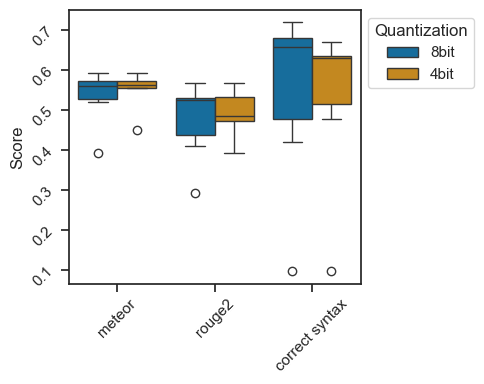

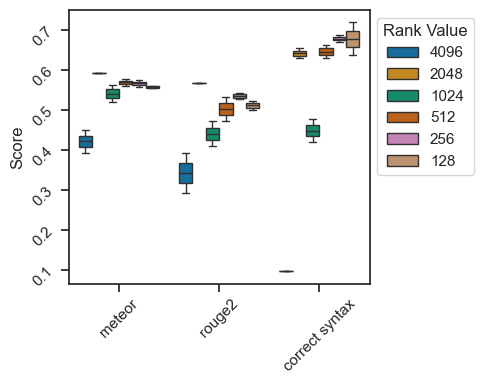

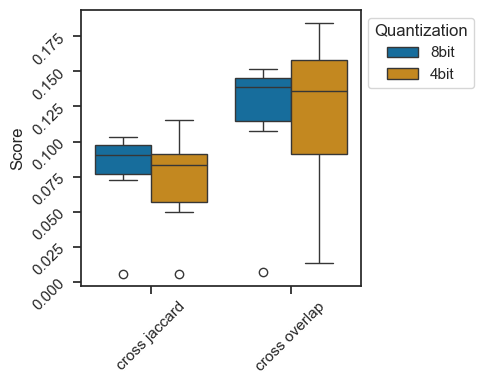

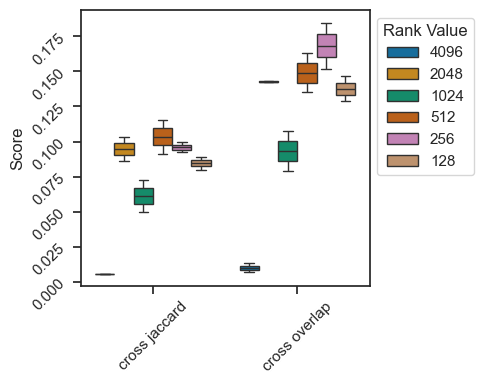

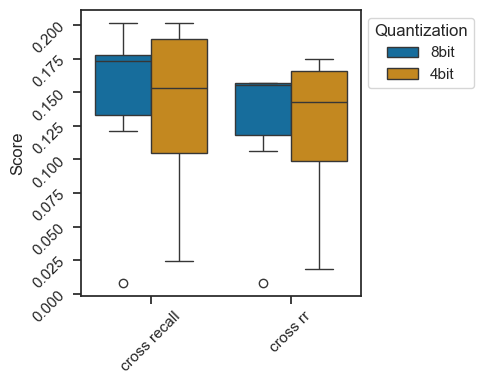

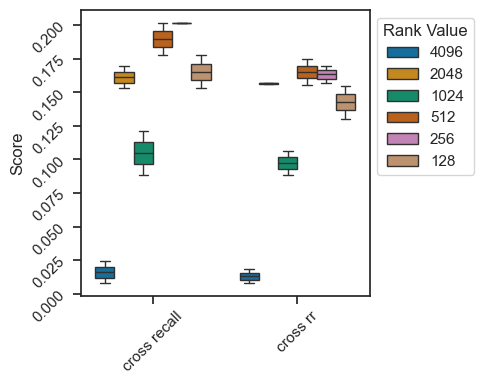

In [51]:
import matplotlib.axis
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

r_mt_metrics = ["quantization", "rvalue", "meteor", "rouge2", "correct syntax"]
r_sim_metrics = ["quantization", "rvalue", "cross jaccard", "cross overlap"]
r_ir_metrics = ["quantization", "rvalue", "cross recall", "cross rr"]


r_mt_metrics_impact = df_clean[r_mt_metrics]
df_melted_r_mt_metrics_impact = r_mt_metrics_impact.melt(id_vars=['quantization', 'rvalue'], var_name='metric', value_name='score')

r_sim_metrics_impact = df_clean[r_sim_metrics]
df_melted_r_sim_metrics_impact = r_sim_metrics_impact.melt(id_vars=['quantization', 'rvalue'], var_name='metric', value_name='score')

r_ir_metrics_impact = df_clean[r_ir_metrics]
df_melted_r_ir_metrics_impact = r_ir_metrics_impact.melt(id_vars=['quantization', 'rvalue'], var_name='metric', value_name='score')

sns.set_theme(style="ticks", palette="colorblind")

fig = plt.figure(figsize=(5, 4))
sns.boxplot(data=df_melted_r_mt_metrics_impact, x='metric', y='score', hue='quantization')
plt.xlabel(None)
plt.ylabel('Score')
plt.tick_params(rotation=45)
plt.legend(title='Quantization', bbox_to_anchor=(1.0, 1), loc='upper left')
fig.tight_layout()
plt.show()

fig = plt.figure(figsize=(5, 4))
sns.boxplot(data=df_melted_r_mt_metrics_impact, x='metric', y='score', hue='rvalue')
plt.xlabel(None)
plt.ylabel('Score')
plt.tick_params(rotation=45)
plt.legend(title='Rank Value', bbox_to_anchor=(1.0, 1), loc='upper left')
fig.tight_layout()
plt.show()

fig = plt.figure(figsize=(5, 4))
sns.boxplot(data=df_melted_r_sim_metrics_impact, x='metric', y='score', hue='quantization')
plt.xlabel(None)
plt.ylabel('Score')
plt.tick_params(rotation=45)
plt.legend(title='Quantization', bbox_to_anchor=(1.0, 1), loc='upper left')
fig.tight_layout()
plt.show()

fig = plt.figure(figsize=(5, 4))
sns.boxplot(data=df_melted_r_sim_metrics_impact, x='metric', y='score', hue='rvalue')
plt.xlabel(None)
plt.ylabel('Score')
plt.tick_params(rotation=45)
plt.legend(title='Rank Value', bbox_to_anchor=(1.0, 1), loc='upper left')
fig.tight_layout()
plt.show()

fig = plt.figure(figsize=(5, 4))
sns.boxplot(data=df_melted_r_ir_metrics_impact, x='metric', y='score', hue='quantization')
plt.xlabel(None)
plt.ylabel('Score')
plt.tick_params(rotation=45)
plt.legend(title='Quantization', bbox_to_anchor=(1.0, 1), loc='upper left')
fig.tight_layout()
plt.show()

fig = plt.figure(figsize=(5, 4))
sns.boxplot(data=df_melted_r_ir_metrics_impact, x='metric', y='score', hue='rvalue')
plt.xlabel(None)
plt.ylabel('Score')
plt.tick_params(rotation=45)
plt.legend(title='Rank Value', bbox_to_anchor=(1.0, 1), loc='upper left')
fig.tight_layout()
plt.show()

In [11]:
a = df_clean.melt(id_vars=['rvalue'], var_name='metrics', value_vars=['correct syntax', 'cross precision', 'bleu'])
a['rvalue'] = a['rvalue'].astype(int)
a = a.sort_values(by="rvalue")
a.head()

,rvalue,metrics,value
17,128,cross precision,0.109677
29,128,bleu,0.536973
23,128,cross precision,0.096774
11,128,correct syntax,0.637097
5,128,correct syntax,0.717742


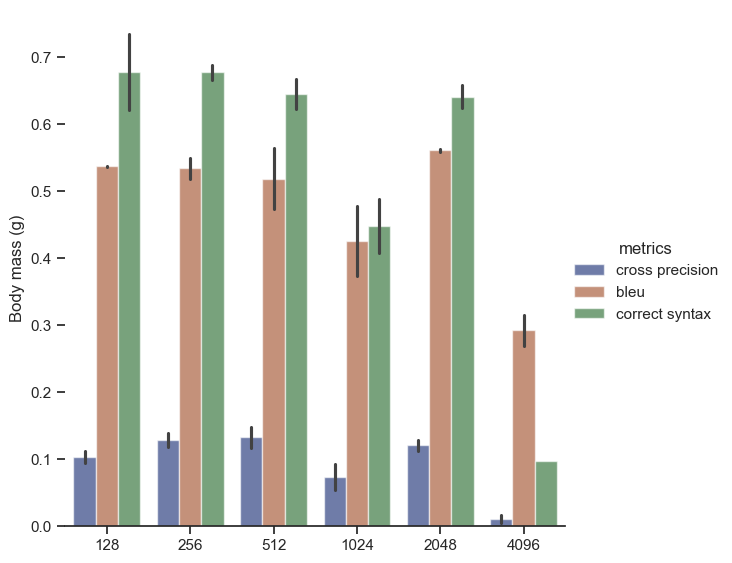

In [12]:
g = sns.catplot(
    data=a, kind="bar",
    x="rvalue", y='value', hue="metrics",
    errorbar="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Body mass (g)")
# g.legend.set_title("")

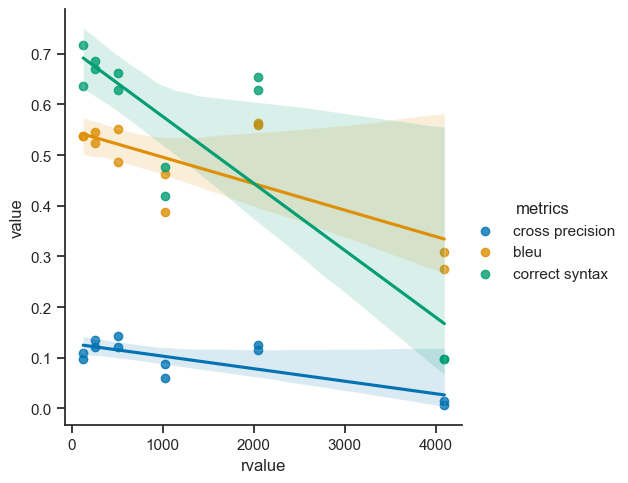

In [13]:
sns.lmplot(x="rvalue", y="value", hue="metrics", data=a)

# Basic vs Template pipeline experiment

In [14]:
def clean_data_b_v_t(df):
    # Drop columns: 'Notes', 'User' and 128 other columns
    df = df.drop(columns=['Notes', 'User', 'Tags', 'Sweep', 'accelerator_config.even_batches', 'accelerator_config.non_blocking', 'accelerator_config.split_batches', 'accelerator_config.use_seedable_sampler', 'adafactor', 'adam_beta1', 'adam_beta2', 'adam_epsilon', 'add_cross_attention', 'attention_dropout', 'auto_find_batch_size', 'ddp_timeout', 'disable_tqdm', 'diversity_penalty', 'debug', 'do_eval', 'do_predict', 'do_sample', 'do_train', 'early_stopping', 'encoder_no_repeat_ngram_size', 'eos_token_id', 'eval_delay', 'eval_do_concat_batches', 'eval_on_start', 'fsdp', 'fsdp_config.min_num_params', 'fsdp_config.xla', 'fsdp_config.xla_fsdp_grad_ckpt', 'fsdp_config.xla_fsdp_v2', 'fsdp_min_num_params', 'full_determinism', 'group_by_length', 'hidden_act', 'hidden_size', 'hub_always_push', 'hub_private_repo', 'hub_strategy', 'hub_token', 'id2label.0', 'id2label.1', 'ignore_data_skip', 'include_num_input_tokens_seen', 'include_tokens_per_second', 'initializer_range', 'intermediate_size', 'is_decoder', 'is_encoder_decoder', 'jit_mode_eval', 'label2id.LABEL_0', 'label2id.LABEL_1', 'label_smoothing_factor', 'length_column_name', 'length_penalty', 'load_best_model_at_end', 'local_rank', 'log_level', 'log_level_replica', 'log_on_each_node', 'logging_dir', 'logging_first_step', 'logging_nan_inf_filter', 'logging_steps', 'logging_strategy', 'mp_parameters', 'no_cuda', 'no_repeat_ngram_size', 'num_attention_heads', 'num_beam_groups', 'num_beams', 'num_hidden_layers', 'num_key_value_heads', 'num_of_sequences', 'num_return_sequences', 'output_attentions', 'output_dir', 'output_hidden_states', 'output_scores', 'overwrite_output_dir', 'packing', 'past_index', 'peft_config.default.base_model_name_or_path', 'peft_config.default.bias', 'peft_config.default.fan_in_fan_out', 'peft_config.default.inference_mode', 'peft_config.default.init_lora_weights', 'peft_config.default.megatron_core', 'peft_config.default.peft_type', 'peft_config.default.use_dora', 'peft_config.default.use_rslora', 'prediction_loss_only', 'push_to_hub', 'push_to_hub_token', 'ray_scope', 'remove_invalid_values', 'remove_unused_columns', 'repetition_penalty', 'report_to', 'restore_callback_states_from_checkpoint', 'return_dict', 'return_dict_in_generate', 'rms_norm_eps', 'rope_theta', 'save_on_each_node', 'save_only_model', 'save_safetensors', 'save_steps', 'save_strategy', 'skip_memory_metrics', 'tf_legacy_loss', 'tie_encoder_decoder', 'tie_word_embeddings', 'top_k', 'top_p', 'torch_compile', 'torch_dtype', 'torchscript', 'tpu_metrics_debug', 'transformers_version', 'use_cpu', 'use_ipex', 'use_legacy_prediction_loop', 'use_mps_device', 'vocab_size', 'warmup_steps', 'weight_decay'])
    # Drop columns: 'batch_eval_metrics', 'bf16' and 12 other columns
    df = df.drop(columns=['batch_eval_metrics', 'bf16', 'bf16_full_eval', 'bos_token_id', 'chars_per_token', 'chunk_size_feed_forward', 'dataloader_drop_last', 'dataloader_num_workers', 'dataloader_persistent_workers', 'dataloader_pin_memory', 'dataset_batch_size', 'dataset_num_proc', 'dataset_text_field', 'eval_strategy'])
    # Drop columns: 'Created', 'Runtime' and 53 other columns
    df = df.drop(columns=['Created', 'Runtime', '_name_or_path', 'architectures', 'fp16', 'fp16_backend', 'fp16_full_eval', 'fp16_opt_level', 'generation_config', 'generation_num_beams', 'gradient_accumulation_steps', 'gradient_checkpointing', 'gradient_checkpointing_kwargs.use_reentrant', 'half_precision_backend', 'include_inputs_for_metrics', 'learning_rate', 'lr_scheduler_type', 'max_grad_norm', 'max_length', 'max_position_embeddings', 'max_seq_length', 'max_steps', 'min_length', 'model/num_parameters', 'model_type', 'num_train_epochs', 'optim', 'pad_token_id', 'peft_config.default.lora_alpha', 'peft_config.default.lora_dropout', 'peft_config.default.r', 'peft_config.default.target_modules', 'peft_config.default.task_type', 'per_device_eval_batch_size', 'per_device_train_batch_size', 'predict_with_generate', 'quantization_config._load_in_4bit', 'quantization_config._load_in_8bit', 'quantization_config.bnb_4bit_compute_dtype', 'quantization_config.bnb_4bit_quant_storage', 'quantization_config.bnb_4bit_quant_type', 'quantization_config.bnb_4bit_use_double_quant', 'quantization_config.llm_int8_enable_fp32_cpu_offload', 'quantization_config.llm_int8_has_fp16_weight', 'quantization_config.llm_int8_threshold', 'quantization_config.load_in_4bit', 'quantization_config.load_in_8bit', 'quantization_config.quant_method', 'run_name', 'seed', 'temperature', 'typical_p', 'use_bfloat16', 'use_cache', 'warmup_ratio'])
    # Filter rows based on column: 'eval/bleu'
    df = df[df['eval/bleu'].notna()]
    # Drop columns: 'train_runtime', 'train_samples_per_second', 'train_steps_per_second'
    df = df.drop(columns=['train_runtime', 'train_samples_per_second', 'train_steps_per_second'])
    # Drop columns: 'eval/runtime', 'eval/samples_per_second' and 2 other columns
    df = df.drop(columns=['eval/runtime', 'eval/samples_per_second', 'eval/steps_per_second', 'total_flos'])
    # Drop column: 'State'
    df = df.drop(columns=['State'])
    # Drop columns: 'train/global_step', 'train/grad_norm', 'train/learning_rate'
    df = df.drop(columns=['train/global_step', 'train/grad_norm', 'train/learning_rate', 'eval_use_gather_object', 'peft_config.default.runtime_config.ephemeral_gpu_offload'])
    # Drop column: 'train_loss'
    df = df.drop(columns=['train_loss'])
    df["Name"] = df["Name"].apply(lambda x: x.split("_")[1].split("-")[3] + " " + x.split("_")[1].split("-")[14] + " " + x.split("_")[1].split("-")[15])
    df.columns = df.columns.str.removeprefix("eval/").str.removeprefix("train/").str.replace("_", " ")
    return df

## Basic vs Labelized on Mistral Instructions

In [15]:
df_b_v_t = pd.read_csv("../datasets/basic_vs_template_experiment.csv")

df_clean_b_v_t = clean_data_b_v_t(df_b_v_t)
df_clean_b_v_t['dataset'] = df_clean_b_v_t['Name'].apply(lambda x: "Mistral")
df_clean_b_v_t.head()

,Name,bleu,correct syntax,cross dice coeff,cross jaccard,cross map,cross overlap,cross precision,cross recall,cross rr,...,id recall,id rr,meteor,rouge1,rouge2,rougeL,rougeLsum,epoch,loss,dataset
0,rv2048 template template,0.544956,0.258065,0.045766,0.037256,0.039886,0.075806,0.041935,0.088710,0.076613,...,0.072581,0.062500,0.565976,0.633466,0.527842,0.584914,0.629361,2.983923,0.1003,Mistral
1,rv2048 template basic,0.401952,0.338710,0.042763,0.039116,0.038385,0.051094,0.041935,0.072581,0.058065,...,0.048387,0.042339,0.511377,0.516339,0.420814,0.475223,0.513245,2.983923,0.1054,Mistral
2,rv2048 basic template,0.321934,0.838710,0.029490,0.027032,0.026542,0.049818,0.037097,0.072581,0.058468,...,0.040323,0.026210,0.517635,0.539490,0.353272,0.490981,0.536522,2.983923,0.2624,Mistral
3,rv2048 basic basic,0.322684,0.830645,0.043197,0.036799,0.035821,0.068118,0.061290,0.088710,0.074194,...,0.056452,0.056452,0.501285,0.520695,0.348611,0.474358,0.516670,2.983923,0.2618,Mistral
4,rv512 template template,0.414397,0.564516,0.115958,0.100748,0.099985,0.149499,0.120968,0.177419,0.151882,...,0.120968,0.099462,0.524606,0.510924,0.405370,0.447891,0.504695,2.983923,0.1491,Mistral


In [16]:
print_latex(df_clean_b_v_t[mt_metrics])

\begin{table}
\resizebox{\textwidth}{!}{
\begin{tabular}{lrrrrrrr}
\toprule
Name & bleu & meteor & rouge1 & rouge2 & rougeL & rougeLsum & correct syntax \\
\midrule
rv2048 template template & 0.54 & 0.57 & 0.63 & 0.53 & 0.58 & 0.63 & 0.26 \\
rv2048 template basic & 0.40 & 0.51 & 0.52 & 0.42 & 0.48 & 0.51 & 0.34 \\
rv2048 basic template & 0.32 & 0.52 & 0.54 & 0.35 & 0.49 & 0.54 & 0.84 \\
rv2048 basic basic & 0.32 & 0.50 & 0.52 & 0.35 & 0.47 & 0.52 & 0.83 \\
rv512 template template & 0.41 & 0.52 & 0.51 & 0.41 & 0.45 & 0.50 & 0.56 \\
rv512 template basic & 0.47 & 0.56 & 0.57 & 0.45 & 0.50 & 0.56 & 0.64 \\
rv512 basic template & 0.32 & 0.49 & 0.49 & 0.31 & 0.44 & 0.49 & 0.85 \\
rv512 basic basic & 0.30 & 0.48 & 0.47 & 0.30 & 0.41 & 0.46 & 0.88 \\
\bottomrule
\end{tabular}
}
\caption{}
\label{}
\end{table}


In [17]:
print_latex(df_clean_b_v_t[sim_metrics])

\begin{table}
\resizebox{\textwidth}{!}{
\begin{tabular}{lrrrrrrrrr}
\toprule
Name & cross dice coeff & cross jaccard & cross overlap & gnv dice coeff & gnv jaccard & gnv overlap & id dice coeff & id jaccard & id overlap \\
\midrule
rv2048 template template & 0.05 & 0.04 & 0.08 & 0.03 & 0.02 & 0.06 & 0.04 & 0.03 & 0.07 \\
rv2048 template basic & 0.04 & 0.04 & 0.05 & 0.02 & 0.02 & 0.03 & 0.03 & 0.02 & 0.04 \\
rv2048 basic template & 0.03 & 0.03 & 0.05 & 0.02 & 0.02 & 0.03 & 0.03 & 0.02 & 0.03 \\
rv2048 basic basic & 0.04 & 0.04 & 0.07 & 0.03 & 0.02 & 0.05 & 0.03 & 0.03 & 0.05 \\
rv512 template template & 0.12 & 0.10 & 0.15 & 0.07 & 0.05 & 0.09 & 0.08 & 0.08 & 0.10 \\
rv512 template basic & 0.08 & 0.07 & 0.11 & 0.06 & 0.05 & 0.07 & 0.07 & 0.06 & 0.08 \\
rv512 basic template & 0.01 & 0.01 & 0.03 & 0.01 & 0.01 & 0.01 & 0.01 & 0.01 & 0.01 \\
rv512 basic basic & 0.03 & 0.03 & 0.06 & 0.01 & 0.01 & 0.02 & 0.01 & 0.01 & 0.02 \\
\bottomrule
\end{tabular}
}
\caption{}
\label{}
\end{table}


In [18]:
print_latex(df_clean_b_v_t[ir_metrics])

\begin{table}
\resizebox{\textwidth}{!}{
\begin{tabular}{lrrrrrrrrrrrr}
\toprule
Name & cross map & cross precision & cross recall & cross rr & gnv map & gnv precision & gnv recall & gnv rr & id map & id precision & id recall & id rr \\
\midrule
rv2048 template template & 0.04 & 0.04 & 0.09 & 0.08 & 0.02 & 0.04 & 0.07 & 0.07 & 0.03 & 0.04 & 0.07 & 0.06 \\
rv2048 template basic & 0.04 & 0.04 & 0.07 & 0.06 & 0.02 & 0.04 & 0.06 & 0.05 & 0.02 & 0.03 & 0.05 & 0.04 \\
rv2048 basic template & 0.03 & 0.04 & 0.07 & 0.06 & 0.01 & 0.02 & 0.04 & 0.03 & 0.02 & 0.02 & 0.04 & 0.03 \\
rv2048 basic basic & 0.04 & 0.06 & 0.09 & 0.07 & 0.02 & 0.04 & 0.05 & 0.06 & 0.03 & 0.04 & 0.06 & 0.06 \\
rv512 template template & 0.10 & 0.12 & 0.18 & 0.15 & 0.05 & 0.09 & 0.12 & 0.11 & 0.08 & 0.09 & 0.12 & 0.10 \\
rv512 template basic & 0.06 & 0.08 & 0.13 & 0.11 & 0.05 & 0.06 & 0.09 & 0.07 & 0.06 & 0.06 & 0.08 & 0.10 \\
rv512 basic template & 0.01 & 0.02 & 0.04 & 0.03 & 0.01 & 0.01 & 0.02 & 0.02 & 0.01 & 0.01 & 0.02 &

## Basic vs Labelized on Llama3 Instructions

In [19]:
df_b_v_t_on_llama3 = pd.read_csv("../datasets/basic_vs_template_on_llama3_instructions.csv")

df_b_v_t_on_llama3['eval/id_map'] = df_b_v_t_on_llama3['eval/id_map'].combine_first(df_b_v_t_on_llama3['eval/id_mean_average_precision'])
df_b_v_t_on_llama3['eval/gnv_map'] = df_b_v_t_on_llama3['eval/gnv_map'].combine_first(df_b_v_t_on_llama3['eval/gnv_mean_average_precision'])
df_b_v_t_on_llama3['eval/cross_map'] = df_b_v_t_on_llama3['eval/cross_map'].combine_first(df_b_v_t_on_llama3['eval/cross_mean_average_precision'])

df_b_v_t_on_llama3['eval/id_rr'] = df_b_v_t_on_llama3['eval/id_rr'].combine_first(df_b_v_t_on_llama3['eval/id_mean_reciprocal_rank'])
df_b_v_t_on_llama3['eval/gnv_rr'] = df_b_v_t_on_llama3['eval/gnv_rr'].combine_first(df_b_v_t_on_llama3['eval/gnv_mean_reciprocal_rank'])
df_b_v_t_on_llama3['eval/cross_rr'] = df_b_v_t_on_llama3['eval/cross_rr'].combine_first(df_b_v_t_on_llama3['eval/cross_mean_reciprocal_rank'])
df_b_v_t_on_llama3['dataset'] = df_b_v_t_on_llama3['Name'].apply(lambda x: "Llama 3")

df_clean_b_v_t_on_llama3 = clean_data_b_v_t(df_b_v_t_on_llama3)
df_clean_b_v_t_on_llama3.head()

,Name,bleu,correct syntax,cross dice coeff,cross jaccard,cross map,cross mean average precision,cross mean reciprocal rank,cross overlap,cross precision,...,id recall,id rr,meteor,rouge1,rouge2,rougeL,rougeLsum,epoch,loss,dataset
0,rv512 template basic,0.436800,0.596774,0.098800,0.082822,0.082221,0.082221,0.147177,0.136864,0.120968,...,0.112903,0.104839,0.540846,0.545632,0.438881,0.487727,0.539195,2.983923,0.1487,Llama 3
1,rv512 basic template,0.249992,0.741935,0.021390,0.016046,0.015882,0.015882,0.031586,0.032680,0.022581,...,0.032258,0.022849,0.458358,0.436379,0.267877,0.377702,0.427290,2.983923,0.3407,Llama 3
2,rv2048 template template,0.391593,0.233871,0.060189,0.057101,0.061506,0.061506,0.075269,0.067987,0.054839,...,0.056452,0.055108,0.523701,0.530712,0.439156,0.480818,0.526404,2.983923,0.1030,Llama 3
3,rv2048 template basic,0.469301,0.387097,0.055448,0.046526,0.047177,0.047177,0.088710,0.078248,0.069355,...,0.072581,0.066532,0.574136,0.604016,0.500965,0.557443,0.596132,2.983923,0.1063,Llama 3
4,rv2048 basic template,0.175812,0.379032,0.011787,0.008075,0.008416,0.008416,0.016129,0.016935,0.012903,...,0.008065,0.008065,0.435877,0.408718,0.260395,0.359685,0.404044,2.983923,0.2610,Llama 3


In [20]:
print_latex(df_clean_b_v_t_on_llama3[mt_metrics])

\begin{table}
\resizebox{\textwidth}{!}{
\begin{tabular}{lrrrrrrr}
\toprule
Name & bleu & meteor & rouge1 & rouge2 & rougeL & rougeLsum & correct syntax \\
\midrule
rv512 template basic & 0.44 & 0.54 & 0.55 & 0.44 & 0.49 & 0.54 & 0.60 \\
rv512 basic template & 0.25 & 0.46 & 0.44 & 0.27 & 0.38 & 0.43 & 0.74 \\
rv2048 template template & 0.39 & 0.52 & 0.53 & 0.44 & 0.48 & 0.53 & 0.23 \\
rv2048 template basic & 0.47 & 0.57 & 0.60 & 0.50 & 0.56 & 0.60 & 0.39 \\
rv2048 basic template & 0.18 & 0.44 & 0.41 & 0.26 & 0.36 & 0.40 & 0.38 \\
rv2048 basic basic & 0.32 & 0.50 & 0.50 & 0.33 & 0.45 & 0.50 & 0.77 \\
rv512 template template & 0.42 & 0.52 & 0.54 & 0.43 & 0.48 & 0.53 & 0.50 \\
rv512 basic basic & 0.24 & 0.47 & 0.40 & 0.25 & 0.34 & 0.40 & 0.75 \\
\bottomrule
\end{tabular}
}
\caption{}
\label{}
\end{table}


In [21]:
print_latex(df_clean_b_v_t_on_llama3[sim_metrics])

\begin{table}
\resizebox{\textwidth}{!}{
\begin{tabular}{lrrrrrrrrr}
\toprule
Name & cross dice coeff & cross jaccard & cross overlap & gnv dice coeff & gnv jaccard & gnv overlap & id dice coeff & id jaccard & id overlap \\
\midrule
rv512 template basic & 0.10 & 0.08 & 0.14 & 0.07 & 0.05 & 0.12 & 0.07 & 0.06 & 0.11 \\
rv512 basic template & 0.02 & 0.02 & 0.03 & 0.01 & 0.01 & 0.02 & 0.01 & 0.01 & 0.02 \\
rv2048 template template & 0.06 & 0.06 & 0.07 & 0.04 & 0.03 & 0.05 & 0.05 & 0.05 & 0.06 \\
rv2048 template basic & 0.06 & 0.05 & 0.08 & 0.04 & 0.03 & 0.06 & 0.04 & 0.03 & 0.04 \\
rv2048 basic template & 0.01 & 0.01 & 0.02 & 0.01 & 0.00 & 0.01 & 0.00 & 0.00 & 0.01 \\
rv2048 basic basic & 0.04 & 0.03 & 0.06 & 0.02 & 0.01 & 0.04 & 0.02 & 0.02 & 0.04 \\
rv512 template template & 0.10 & 0.09 & 0.12 & 0.06 & 0.05 & 0.09 & 0.08 & 0.07 & 0.09 \\
rv512 basic basic & 0.04 & 0.04 & 0.05 & 0.01 & 0.01 & 0.02 & 0.02 & 0.02 & 0.03 \\
\bottomrule
\end{tabular}
}
\caption{}
\label{}
\end{table}


In [22]:
print_latex(df_clean_b_v_t_on_llama3[ir_metrics])

\begin{table}
\resizebox{\textwidth}{!}{
\begin{tabular}{lrrrrrrrrrrrr}
\toprule
Name & cross map & cross precision & cross recall & cross rr & gnv map & gnv precision & gnv recall & gnv rr & id map & id precision & id recall & id rr \\
\midrule
rv512 template basic & 0.08 & 0.12 & 0.19 & 0.15 & 0.05 & 0.09 & 0.12 & 0.12 & 0.06 & 0.09 & 0.11 & 0.10 \\
rv512 basic template & 0.02 & 0.02 & 0.05 & 0.03 & 0.01 & 0.02 & 0.02 & 0.01 & 0.01 & 0.02 & 0.03 & 0.02 \\
rv2048 template template & 0.06 & 0.05 & 0.07 & 0.08 & 0.03 & 0.03 & 0.03 & 0.05 & 0.05 & 0.04 & 0.06 & 0.06 \\
rv2048 template basic & 0.05 & 0.07 & 0.11 & 0.09 & 0.03 & 0.05 & 0.07 & 0.08 & 0.03 & 0.05 & 0.07 & 0.07 \\
rv2048 basic template & 0.01 & 0.01 & 0.02 & 0.02 & 0.00 & 0.01 & 0.02 & 0.02 & 0.00 & 0.01 & 0.01 & 0.01 \\
rv2048 basic basic & 0.03 & 0.06 & 0.06 & 0.06 & 0.01 & 0.05 & 0.06 & 0.04 & 0.02 & 0.05 & 0.05 & 0.04 \\
rv512 template template & 0.09 & 0.10 & 0.19 & 0.16 & 0.05 & 0.10 & 0.13 & 0.10 & 0.07 & 0.09 & 0.14 &

## Charts

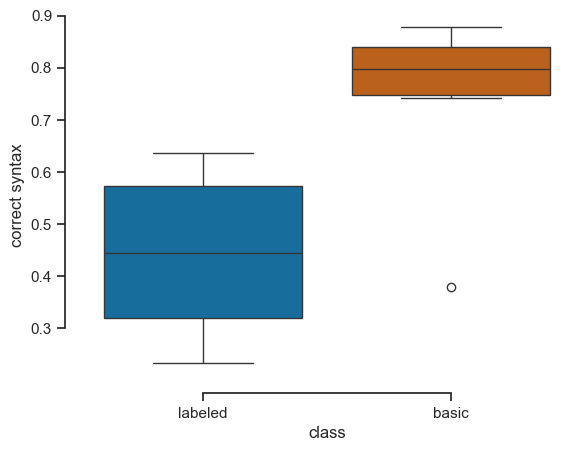

In [23]:
mixed = pd.concat([df_clean_b_v_t, df_clean_b_v_t_on_llama3])
data = mixed.apply(lambda x: x['Name'].split(' ')[1] + " " + str(x['correct syntax']), axis=1).to_list()
classs = [x.split(' ')[0] for x in data]
correct_syntaxs = [x.split(' ')[1] for x in data]
data = {
    "class": [x.replace("template", "labeled") for x in classs],
    "correct syntax": [float(x) for x in correct_syntaxs]
}
sns.set_theme(style="ticks", palette="colorblind")
sns.boxplot(x="class", y="correct syntax",
            hue="class", palette=["b", "r"],
            data=data)
sns.despine(offset=10, trim=True)

In [53]:
b_v_t_mt_metrics = ["dataset", "rvalue", "input", "target", 'input-target', "meteor", "rouge2", "correct syntax"]
b_v_t_ir_metrics = ["dataset", "rvalue", "input", "target", 'input-target', "cross recall", "cross rr"]

mixed['rvalue'] = mixed['Name'].apply(lambda x: x.split(" ")[0].replace('rv', ''))
mixed['input'] = mixed['Name'].apply(lambda x: x.split(" ")[1].replace('template', 'labeled'))
mixed['target'] = mixed['Name'].apply(lambda x: x.split(" ")[2].replace('template', 'labeled'))
mixed['input-target'] = mixed['Name'].apply(lambda x: x.split(" ")[1].replace('template', 'labeled') + " " + x.split(" ")[2].replace('template', 'labeled'))
# mixed.head()

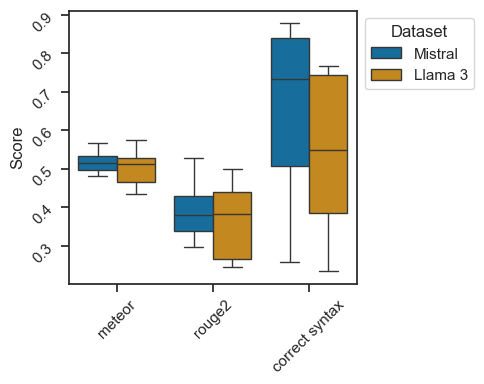

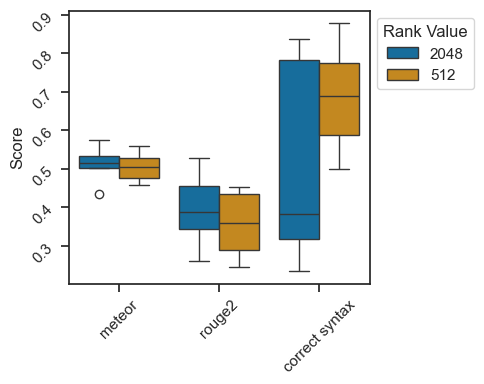

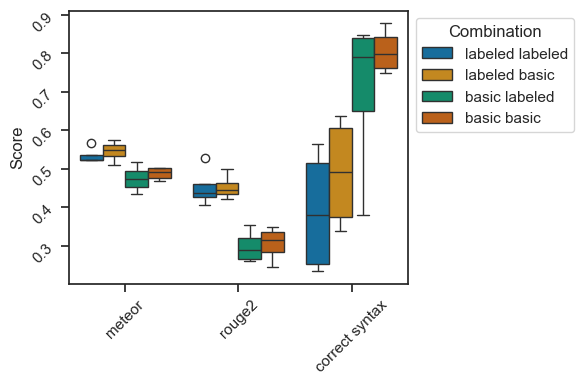

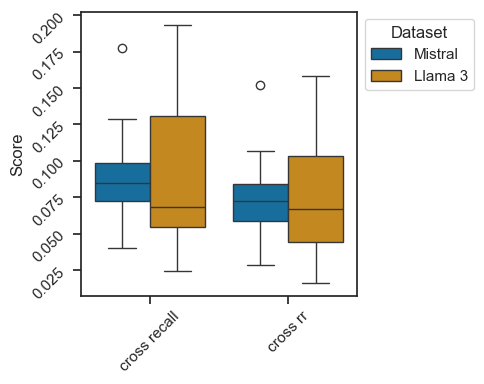

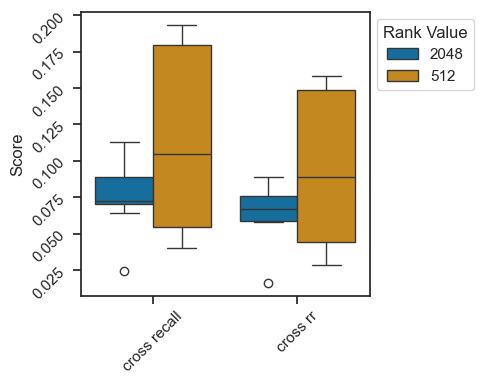

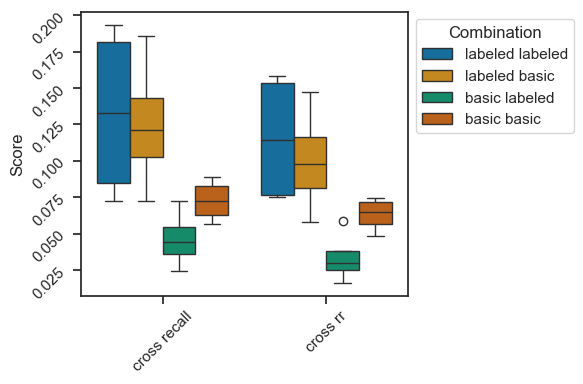

In [54]:
b_v_t_mt_metrics_impact = mixed[b_v_t_mt_metrics]
df_melted_b_v_t_mt_metrics_impact = b_v_t_mt_metrics_impact.melt(id_vars=["dataset", "rvalue", "input", "target", 'input-target'], var_name='metric', value_name='score')

b_v_t_ir_metrics_impact = mixed[b_v_t_ir_metrics]
df_melted_b_v_t_ir_metrics_impact = b_v_t_ir_metrics_impact.melt(id_vars=["dataset", "rvalue", "input", "target", 'input-target'], var_name='metric', value_name='score')

sns.set_theme(style="ticks", palette="colorblind")

fig = plt.figure(figsize=(5, 4))
sns.boxplot(data=df_melted_b_v_t_mt_metrics_impact, x='metric', y='score', hue='dataset')
plt.xlabel(None)
plt.ylabel('Score')
plt.tick_params(rotation=45)
plt.legend(title='Dataset', bbox_to_anchor=(1.0, 1), loc='upper left')
fig.tight_layout()
plt.show()

fig = plt.figure(figsize=(5, 4))
sns.boxplot(data=df_melted_b_v_t_mt_metrics_impact, x='metric', y='score', hue='rvalue')
plt.xlabel(None)
plt.ylabel('Score')
plt.tick_params(rotation=45)
plt.legend(title='Rank Value', bbox_to_anchor=(1.0, 1), loc='upper left')
fig.tight_layout()
plt.show()

# fig = plt.figure(figsize=(5, 4))
# sns.lineplot(data=df_melted_b_v_t_mt_metrics_impact, x='metric', y='score', hue='input', marker='o')
# plt.xlabel(None)
# plt.ylabel('Score')
# plt.tick_params(rotation=45)
# plt.legend(title='Input', bbox_to_anchor=(1.0, 1), loc='upper left')
# fig.tight_layout()
# plt.show()

# fig = plt.figure(figsize=(5, 4))
# sns.lineplot(data=df_melted_b_v_t_mt_metrics_impact, x='metric', y='score', hue='target', marker='o')
# plt.xlabel(None)
# plt.ylabel('Score')
# plt.tick_params(rotation=45)
# plt.legend(title='Target', bbox_to_anchor=(1.0, 1), loc='upper left')
# fig.tight_layout()
# plt.show()

fig = plt.figure(figsize=(6, 4))
sns.boxplot(data=df_melted_b_v_t_mt_metrics_impact, x='metric', y='score', hue='input-target')
plt.xlabel(None)
plt.ylabel('Score')
plt.tick_params(rotation=45)
plt.legend(title='Combination', bbox_to_anchor=(1.0, 1), loc='upper left')
fig.tight_layout()
plt.show()

fig = plt.figure(figsize=(5, 4))
sns.boxplot(data=df_melted_b_v_t_ir_metrics_impact, x='metric', y='score', hue='dataset')
plt.xlabel(None)
plt.ylabel('Score')
plt.tick_params(rotation=45)
plt.legend(title='Dataset', bbox_to_anchor=(1.0, 1), loc='upper left')
fig.tight_layout()
plt.show()

fig = plt.figure(figsize=(5, 4))
sns.boxplot(data=df_melted_b_v_t_ir_metrics_impact, x='metric', y='score', hue='rvalue')
plt.xlabel(None)
plt.ylabel('Score')
plt.tick_params(rotation=45)
plt.legend(title='Rank Value', bbox_to_anchor=(1.0, 1), loc='upper left')
fig.tight_layout()
plt.show()

fig = plt.figure(figsize=(6, 4))
sns.boxplot(data=df_melted_b_v_t_ir_metrics_impact, x='metric', y='score', hue='input-target')
plt.xlabel(None)
plt.ylabel('Score')
plt.tick_params(rotation=45)
plt.legend(title='Combination', bbox_to_anchor=(1.0, 1), loc='upper left')
fig.tight_layout()
plt.show()

# Baseline evaluations

In [56]:
import pandas as pd
import glob
import os
import json

# Path to the parent directory
base_path = "../datasets/baselines"

# List to store all dataframes
all_data = []

# Iterate through all JSON files in all subdirectories
for json_file in glob.glob(os.path.join(base_path, "**/*.json"), recursive=True):
    # Read the JSON file
    with open(json_file, 'r') as f:
        data = json.load(f)
    
    # Convert to DataFrame
    data = data['metrics']
    
    data['gnv_map'] = data.pop('gnv_mean_average_precision')
    data['cross_map'] = data.pop('cross_mean_average_precision')
    data['id_map'] = data.pop('id_mean_average_precision')
    
    data['gnv_rr'] = data.pop('gnv_mean_reciprocal_rank')
    data['cross_rr'] = data.pop('cross_mean_reciprocal_rank')
    data['id_rr'] = data.pop('id_mean_reciprocal_rank')
    
    data['input'] = os.path.basename(json_file).split('.')[0].split("_")[3]
    data['target'] = os.path.basename(json_file).split('.')[0].split("_")[6]
    data['model'] = os.path.basename(os.path.dirname(json_file)).split("_")[0]
    data['dataset'] = os.path.basename(os.path.dirname(json_file)).split("_")[2]
    
    data['input'] = data['input'].replace('templated', 'labeled')
    data['target'] = data['target'].replace('template', 'labeled').replace('raw', 'basic')
    data['model'] = data['model'].replace('mistral', 'Mistral').replace('llama3', 'Llama 3')
    data['dataset'] = data['dataset'].replace('mistral', 'Mistral').replace('llama3', 'Llama 3')
    
    # Append to our list of dataframes
    all_data.append(data)

# Concatenate all dataframes
final_df = pd.DataFrame(all_data)
final_df.columns = final_df.columns.str.removeprefix("eval/").str.removeprefix("train/").str.replace("_", " ")
final_df = final_df.sort_values(by=["input", "target", "dataset", "model"], ascending=[False, False, False, False])
# Display the result
# print(final_df)
final_df.head()

,gnv precision,gnv recall,gnv overlap,gnv jaccard,gnv dice coeff,cross precision,cross recall,cross overlap,cross jaccard,cross dice coeff,...,gnv map,cross map,id map,gnv rr,cross rr,id rr,input,target,model,dataset
15,0.003226,0.008065,0.002688,0.001390,0.002372,0.006452,0.008065,0.005488,0.003418,0.005253,...,0.001145,0.004331,0.002093,0.000000,0.008065,0.008065,labeled,labeled,Mistral,Mistral
7,0.003226,0.008065,0.009134,0.004079,0.005470,0.003226,0.008065,0.015745,0.011905,0.013267,...,0.004039,0.010723,0.008073,0.008065,0.010081,0.008065,labeled,labeled,Llama 3,Mistral
11,0.006452,0.016129,0.006029,0.002570,0.003991,0.006452,0.016129,0.006452,0.004767,0.006452,...,0.002167,0.004577,0.000403,0.004032,0.004032,0.000000,labeled,labeled,Mistral,Llama 3
3,0.008065,0.008065,0.008065,0.008065,0.008065,0.008065,0.008065,0.008065,0.008065,0.008065,...,0.008065,0.008065,0.008065,0.008065,0.008065,0.008065,labeled,labeled,Llama 3,Llama 3
14,0.001613,0.008065,0.004032,0.001344,0.002304,0.001613,0.008065,0.008065,0.001613,0.002688,...,0.001344,0.002688,0.002688,0.001613,0.001613,0.001613,labeled,basic,Mistral,Mistral


In [57]:
b_mt_metrics = ["model", "dataset", "input", "target", "bleu", "meteor", "rouge1", "rouge2", "rougeL", "rougeLsum", "correct syntax"]
b_sim_metrics = ["model", "dataset", "input", "target", "cross dice coeff", "cross jaccard", "cross overlap", "gnv dice coeff", "gnv jaccard", "gnv overlap", "id dice coeff", "id jaccard", "id overlap",]
b_ir_metrics = ["model", "dataset", "input", "target", "cross map", "cross precision", "cross recall", "cross rr", "gnv map", "gnv precision", "gnv recall", "gnv rr", "id map", "id precision", "id recall", "id rr"]

In [58]:
print_latex(final_df[b_mt_metrics])

\begin{table}
\resizebox{\textwidth}{!}{
\begin{tabular}{llllrrrrrrr}
\toprule
model & dataset & input & target & bleu & meteor & rouge1 & rouge2 & rougeL & rougeLsum & correct syntax \\
\midrule
Mistral & Mistral & labeled & labeled & 0.39 & 0.48 & 0.49 & 0.33 & 0.40 & 0.48 & 0.23 \\
Llama 3 & Mistral & labeled & labeled & 0.33 & 0.40 & 0.44 & 0.27 & 0.35 & 0.43 & 0.23 \\
Mistral & Llama 3 & labeled & labeled & 0.37 & 0.49 & 0.49 & 0.33 & 0.40 & 0.48 & 0.11 \\
Llama 3 & Llama 3 & labeled & labeled & 0.32 & 0.41 & 0.44 & 0.27 & 0.35 & 0.43 & 0.22 \\
Mistral & Mistral & labeled & basic & 0.14 & 0.37 & 0.30 & 0.12 & 0.23 & 0.29 & 0.19 \\
Llama 3 & Mistral & labeled & basic & 0.17 & 0.41 & 0.32 & 0.17 & 0.26 & 0.31 & 0.31 \\
Mistral & Llama 3 & labeled & basic & 0.15 & 0.37 & 0.30 & 0.12 & 0.24 & 0.30 & 0.18 \\
Llama 3 & Llama 3 & labeled & basic & 0.17 & 0.42 & 0.33 & 0.17 & 0.27 & 0.32 & 0.38 \\
Mistral & Mistral & basic & labeled & 0.39 & 0.47 & 0.49 & 0.33 & 0.41 & 0.48 & 0.21 \\
Llam

In [59]:
print_latex(final_df[b_sim_metrics])

\begin{table}
\resizebox{\textwidth}{!}{
\begin{tabular}{llllrrrrrrrrr}
\toprule
model & dataset & input & target & cross dice coeff & cross jaccard & cross overlap & gnv dice coeff & gnv jaccard & gnv overlap & id dice coeff & id jaccard & id overlap \\
\midrule
Mistral & Mistral & labeled & labeled & 0.01 & 0.00 & 0.01 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 \\
Llama 3 & Mistral & labeled & labeled & 0.01 & 0.01 & 0.02 & 0.01 & 0.00 & 0.01 & 0.01 & 0.01 & 0.01 \\
Mistral & Llama 3 & labeled & labeled & 0.01 & 0.00 & 0.01 & 0.00 & 0.00 & 0.01 & 0.00 & 0.00 & 0.00 \\
Llama 3 & Llama 3 & labeled & labeled & 0.01 & 0.01 & 0.01 & 0.01 & 0.01 & 0.01 & 0.01 & 0.01 & 0.01 \\
Mistral & Mistral & labeled & basic & 0.00 & 0.00 & 0.01 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.01 \\
Llama 3 & Mistral & labeled & basic & 0.01 & 0.01 & 0.03 & 0.00 & 0.00 & 0.01 & 0.01 & 0.01 & 0.02 \\
Mistral & Llama 3 & labeled & basic & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 \\
Llama 3 & Llam

In [60]:
print_latex(final_df[b_ir_metrics])

\begin{table}
\resizebox{\textwidth}{!}{
\begin{tabular}{llllrrrrrrrrrrrr}
\toprule
model & dataset & input & target & cross map & cross precision & cross recall & cross rr & gnv map & gnv precision & gnv recall & gnv rr & id map & id precision & id recall & id rr \\
\midrule
Mistral & Mistral & labeled & labeled & 0.00 & 0.01 & 0.01 & 0.01 & 0.00 & 0.00 & 0.01 & 0.00 & 0.00 & 0.00 & 0.01 & 0.01 \\
Llama 3 & Mistral & labeled & labeled & 0.01 & 0.00 & 0.01 & 0.01 & 0.00 & 0.00 & 0.01 & 0.01 & 0.01 & 0.00 & 0.01 & 0.01 \\
Mistral & Llama 3 & labeled & labeled & 0.00 & 0.01 & 0.02 & 0.00 & 0.00 & 0.01 & 0.02 & 0.00 & 0.00 & 0.00 & 0.01 & 0.00 \\
Llama 3 & Llama 3 & labeled & labeled & 0.01 & 0.01 & 0.01 & 0.01 & 0.01 & 0.01 & 0.01 & 0.01 & 0.01 & 0.01 & 0.01 & 0.01 \\
Mistral & Mistral & labeled & basic & 0.00 & 0.00 & 0.01 & 0.00 & 0.00 & 0.00 & 0.01 & 0.00 & 0.00 & 0.00 & 0.01 & 0.00 \\
Llama 3 & Mistral & labeled & basic & 0.01 & 0.01 & 0.03 & 0.03 & 0.00 & 0.01 & 0.02 & 0.02 & 0.01 &

## Charts

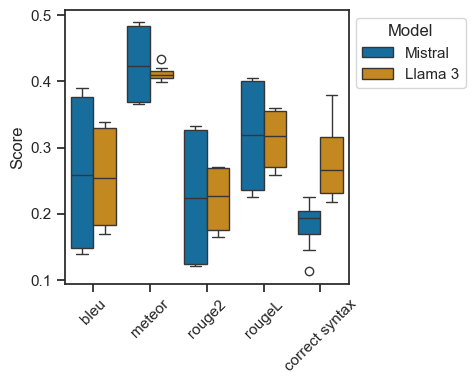

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# max_mt_metrics = final_df[b_mt_metrics].groupby('model')[['bleu', 'meteor', 'rouge2', 'rougeL', 'correct syntax']].mean().reset_index()
max_mt_metrics = final_df[b_mt_metrics][['model', 'bleu', 'meteor', 'rouge2', 'rougeL', 'correct syntax']]
df_melted = max_mt_metrics.melt(id_vars=['model'], var_name='metric', value_name='score')

plt.figure(figsize=(5, 4))
sns.boxplot(data=df_melted, x='metric', y='score', hue='model')
plt.xlabel(None)
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Model', bbox_to_anchor=(1.00, 1), loc='upper left')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [62]:
df_melted_config_diff

,model,input,target,metric,score,config
0,Mistral,labeled,labeled,bleu,0.390727,labeled labeled
1,Llama 3,labeled,labeled,bleu,0.326176,labeled labeled
2,Mistral,labeled,labeled,bleu,0.371610,labeled labeled
3,Llama 3,labeled,labeled,bleu,0.315242,labeled labeled
4,Mistral,labeled,basic,bleu,0.141807,labeled basic
...,...,...,...,...,...,...
107,Llama 3,basic,labeled,correct syntax,0.225806,basic labeled
108,Mistral,basic,basic,correct syntax,0.145161,basic basic
109,Llama 3,basic,basic,correct syntax,0.346774,basic basic
110,Mistral,basic,basic,correct syntax,0.201613,basic basic


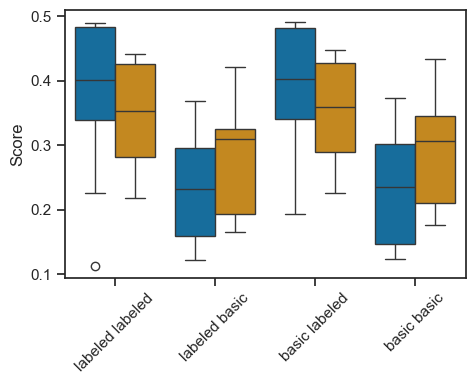

In [63]:
config_diff = final_df[b_mt_metrics][['model', 'input', 'target', 'bleu', 'meteor', 'rouge1', 'rouge2', 'rougeL', 'rougeLsum', 'correct syntax']]
df_melted_config_diff = config_diff.melt(id_vars=['model', 'input', 'target'], var_name='metric', value_name='score')
df_melted_config_diff['config'] = df_melted_config_diff[['input', 'target']].apply(lambda x: x['input'] + ' ' + x['target'], axis=1)
df_melted_config_diff

plt.figure(figsize=(5, 4))
sns.boxplot(data=df_melted_config_diff, x='config', y='score', hue='model')
plt.xlabel(None)
plt.ylabel('Score')
plt.xticks(rotation=45)
# plt.legend(title='Model', bbox_to_anchor=(1.00, 1), loc='upper left')
plt.legend().remove()
# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Comparing results with baselines

In [90]:
# bvt_mistral_2048 = mixed.loc[(mixed['rvalue'] == "2048") & (mixed['input-target'] == 'labeled labeled')].iloc[0] # bvt mistral
# bvt_mistral_512 = mixed.loc[(mixed['rvalue'] == "512") & (mixed['input-target'] == 'labeled labeled')].iloc[0] # bvt mistral
# bvt_mistral_2048['finetuned'] = True
# bvt_mistral_512['finetuned'] = True
# df_compare = pd.DataFrame(data=[bvt_mistral_2048, bvt_mistral_512])
df_compare = mixed.copy()
df_compare["model"] = pd.Series(data=['Mistral*']*len(df_compare))
df_compare['finetuned'] = df_compare['id overlap'].apply(lambda x: True)
df_compare = df_compare.drop(['Name', 'cross mean average precision', 'cross mean reciprocal rank',
       'gnv mean average precision', 'gnv mean reciprocal rank',
       'id mean average precision', 'id mean reciprocal rank',
       'rvalue', 'epoch', 'loss'], axis=1)
df_compare.columns

Index(['bleu', 'correct syntax', 'cross dice coeff', 'cross jaccard',
       'cross map', 'cross overlap', 'cross precision', 'cross recall',
       'cross rr', 'gnv dice coeff', 'gnv jaccard', 'gnv map', 'gnv overlap',
       'gnv precision', 'gnv recall', 'gnv rr', 'id dice coeff', 'id jaccard',
       'id map', 'id overlap', 'id precision', 'id recall', 'id rr', 'meteor',
       'rouge1', 'rouge2', 'rougeL', 'rougeLsum', 'dataset', 'input', 'target',
       'input-target', 'model', 'finetuned'],
      dtype='object')

In [91]:
temp_compare = final_df.copy()
temp_compare['finetuned'] = temp_compare['id overlap'].apply(lambda x: False) # Just filling the column with False
temp_compare['input-target'] = temp_compare.apply(lambda x: x['input'] + " " + x["target"], axis=1)
# temp_compare = temp_compare.drop(['model'], axis=1)
temp_compare.columns

Index(['gnv precision', 'gnv recall', 'gnv overlap', 'gnv jaccard',
       'gnv dice coeff', 'cross precision', 'cross recall', 'cross overlap',
       'cross jaccard', 'cross dice coeff', 'id precision', 'id recall',
       'id overlap', 'id jaccard', 'id dice coeff', 'rouge1', 'rouge2',
       'rougeL', 'rougeLsum', 'meteor', 'bleu', 'correct syntax', 'gnv map',
       'cross map', 'id map', 'gnv rr', 'cross rr', 'id rr', 'input', 'target',
       'model', 'dataset', 'finetuned', 'input-target'],
      dtype='object')

In [92]:
df_compare = pd.concat([df_compare, temp_compare])
df_compare.head()

,bleu,correct syntax,cross dice coeff,cross jaccard,cross map,cross overlap,cross precision,cross recall,cross rr,gnv dice coeff,...,rouge1,rouge2,rougeL,rougeLsum,dataset,input,target,input-target,model,finetuned
0,0.544956,0.258065,0.045766,0.037256,0.039886,0.075806,0.041935,0.088710,0.076613,0.028378,...,0.633466,0.527842,0.584914,0.629361,Mistral,labeled,labeled,labeled labeled,Mistral*,True
1,0.401952,0.338710,0.042763,0.039116,0.038385,0.051094,0.041935,0.072581,0.058065,0.022830,...,0.516339,0.420814,0.475223,0.513245,Mistral,labeled,basic,labeled basic,Mistral*,True
2,0.321934,0.838710,0.029490,0.027032,0.026542,0.049818,0.037097,0.072581,0.058468,0.019611,...,0.539490,0.353272,0.490981,0.536522,Mistral,basic,labeled,basic labeled,Mistral*,True
3,0.322684,0.830645,0.043197,0.036799,0.035821,0.068118,0.061290,0.088710,0.074194,0.026463,...,0.520695,0.348611,0.474358,0.516670,Mistral,basic,basic,basic basic,Mistral*,True
4,0.414397,0.564516,0.115958,0.100748,0.099985,0.149499,0.120968,0.177419,0.151882,0.066657,...,0.510924,0.405370,0.447891,0.504695,Mistral,labeled,labeled,labeled labeled,Mistral*,True


## Charts

In [93]:
df_compare.columns = df_compare.columns.str.replace('gnv', 'nv')

compare_data = df_compare.melt(id_vars=["model", "dataset", 'input-target', 'finetuned'], var_name='metric', value_vars=[
       'cross overlap', 'cross jaccard', 'rouge2',
       'meteor', 'correct syntax',
       'cross rr', 'cross recall'])

In [94]:
compare_data

,model,dataset,input-target,finetuned,metric,value
0,Mistral*,Mistral,labeled labeled,True,cross overlap,0.075806
1,Mistral*,Mistral,labeled basic,True,cross overlap,0.051094
2,Mistral*,Mistral,basic labeled,True,cross overlap,0.049818
3,Mistral*,Mistral,basic basic,True,cross overlap,0.068118
4,Mistral*,Mistral,labeled labeled,True,cross overlap,0.149499
...,...,...,...,...,...,...
219,Llama 3,Llama 3,basic labeled,False,cross recall,0.016129
220,Mistral,Mistral,basic basic,False,cross recall,0.000000
221,Llama 3,Mistral,basic basic,False,cross recall,0.024194
222,Mistral,Llama 3,basic basic,False,cross recall,0.000000


In [95]:
mt_metrics = ["bleu", "meteor", "rouge1", "rouge2", "rougeL", "rougeLsum", "correct syntax"]
sim_metrics = ["cross dice coeff", "cross jaccard", "cross overlap", "nv dice coeff", "nv jaccard", "nv overlap", "id dice coeff", "id jaccard", "id overlap"]
ir_metrics = ["cross map", "cross precision", "cross recall", "cross rr", "nv map", "nv precision", "nv recall", "nv rr", "id map", "id precision", "id recall", "id rr"]

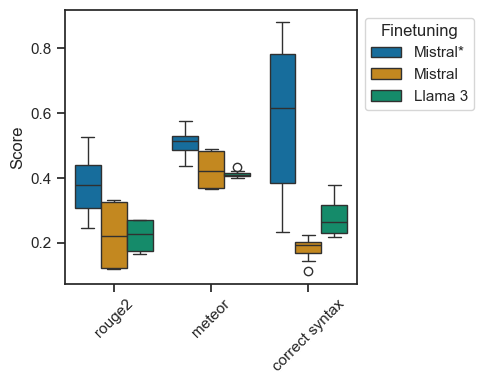

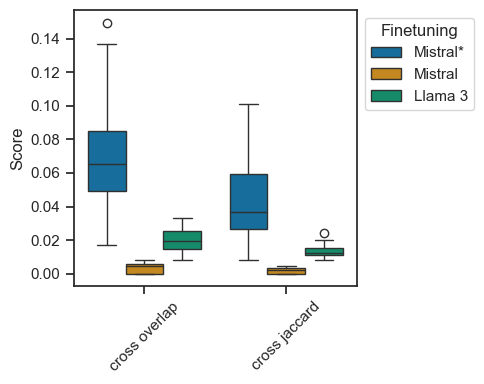

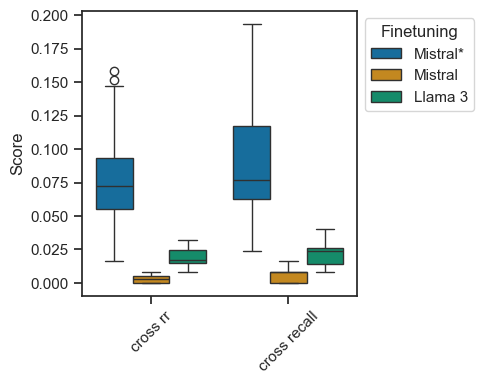

In [96]:
plt.figure(figsize=(5, 4))
sns.boxplot(data=compare_data.loc[compare_data['metric'].isin(mt_metrics)], x='metric', y='value', hue='model')
plt.xlabel(None)
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Finetuning', bbox_to_anchor=(1.00, 1), loc='upper left')
# Adjust layout and display the plot
plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 4))
sns.boxplot(data=compare_data.loc[compare_data['metric'].isin(sim_metrics)], x='metric', y='value', hue='model')
plt.xlabel(None)
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Finetuning', bbox_to_anchor=(1.00, 1), loc='upper left')
# Adjust layout and display the plot
plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 4))
sns.boxplot(data=compare_data.loc[compare_data['metric'].isin(ir_metrics)], x='metric', y='value', hue='model')
plt.xlabel(None)
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Finetuning', bbox_to_anchor=(1.00, 1), loc='upper left')
# Adjust layout and display the plot
plt.tight_layout()
plt.show()